In [48]:
import numpy as np
import matplotlib.pyplot as plt

def read_data(path):
    """returns B in mT and Kerr rotation in mdeg"""
    x = np.loadtxt(path,delimiter = "\t")
    return x[:,2], x[:,6]

def plot_data(B, Kerr):
    plt.scatter(B,Kerr,marker=".",color="black")
    plt.grid()
    plt.xlabel("B in mT")
    plt.ylabel("Kerr rotation in m°")
    plt.axhline(0, color='orange', linestyle='--')
    plt.axvline(0,color="gray",linestyle="--")

def center_data(kerr):
    return kerr - np.mean(kerr)
    
def plot_centered(B,Kerr):
    Kerr_centered = Kerr - np.mean(Kerr)
    
    plt.scatter(B, Kerr_centered,marker="x",color="black")
    plt.grid()
    plt.xlabel("B in mT")
    plt.ylabel("Centered Kerr rotation in m°")
    plt.axhline(0, color='gray', linestyle='--')  # add a zero line


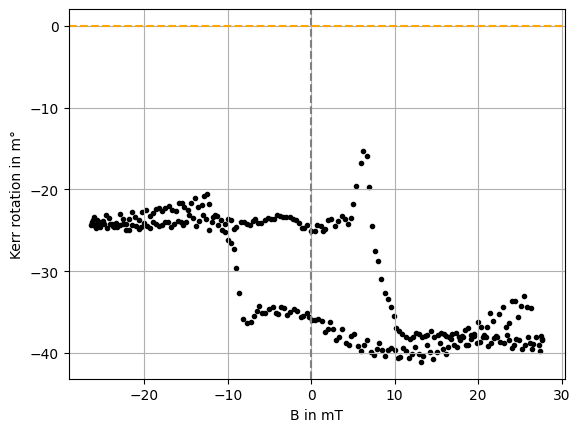

In [54]:
b, kerr = read_data("Daten/sample6_lmoke_a3_i3")
plot_data(b,kerr)


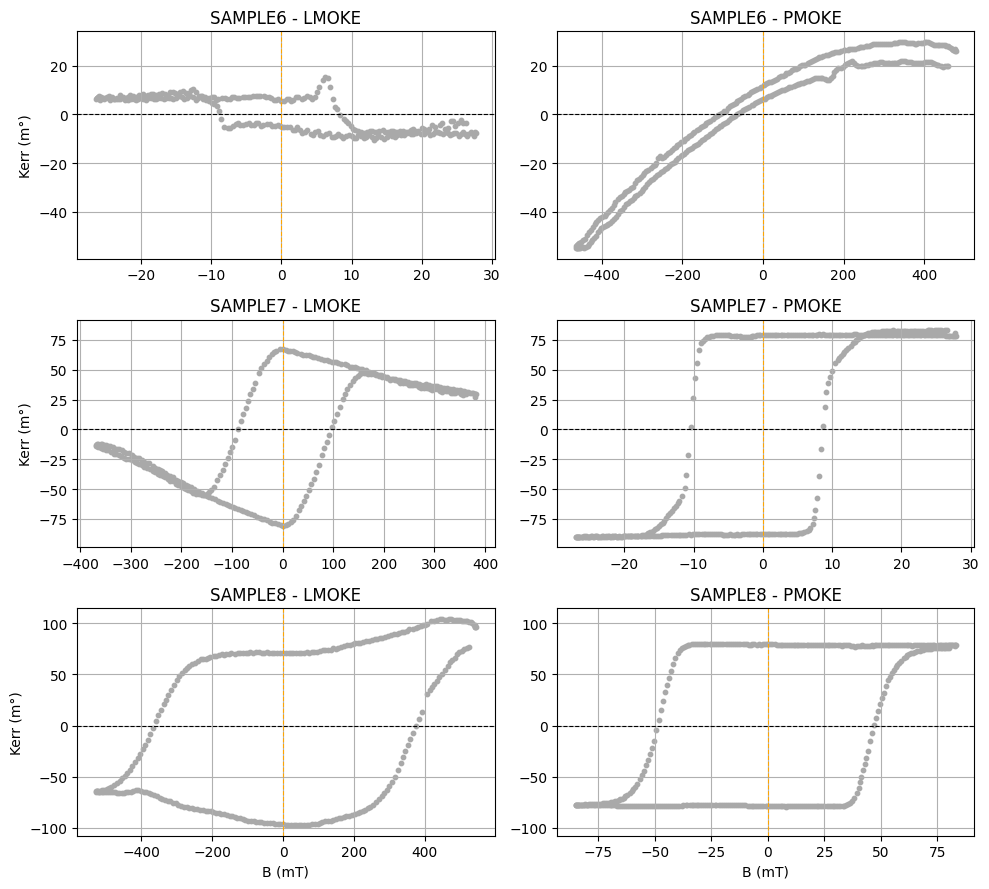

In [66]:
# task 1 & 2:
samples = ["sample6", "sample7", "sample8"]
setups = ["lmoke", "pmoke"]

fig, axes = plt.subplots(3, 2, figsize=(10, 9))

for i in range(3):
    # sharey only within the same row
    axes[i, 1].sharey(axes[i, 0])
for i, sample in enumerate(samples):
    for j, setup in enumerate(setups):
        ax = axes[i, j]
        path = f"Daten/{sample}_{setup}_a3_i3"
        B, Kerr = read_data(path)
        centered_kerr = center_data(Kerr)
        # Plot
        
        ax.scatter(B, centered_kerr, s=10,color="darkgray")
        ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
        ax.axvline(0, color='orange', linestyle='--', linewidth=0.8)
        ax.grid()
        # Titles and labels
        ax.set_title(f"{sample.upper()} - {setup.upper()}")
        if j == 0:
            ax.set_ylabel("Kerr (m°)")
        if i == 2:
            ax.set_xlabel("B (mT)")

plt.tight_layout()
plt.savefig("task12.png")
plt.show()
